In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Define Activate Functions

### Sigmoid

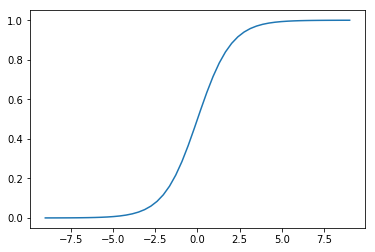

In [2]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(start=-9, stop=+9)
yy = sigmoid(xx)

plt.plot(xx, yy)

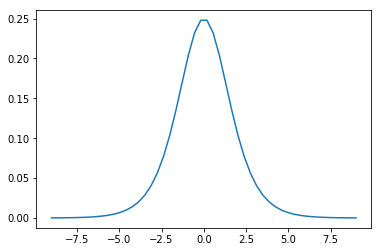

In [3]:
def sigmoid_derivative(n):
    return sigmoid(n) * (1 - sigmoid(n))

xx = np.linspace(start=-9, stop=+9)
yy = sigmoid_derivative(xx)

plt.plot(xx, yy)

### ReLU

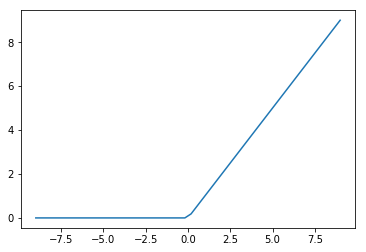

In [4]:
def relu(n):
    return n * (n > 0)

xx = np.linspace(start=-9, stop=+9)
yy = relu(xx)

plt.plot(xx, yy)

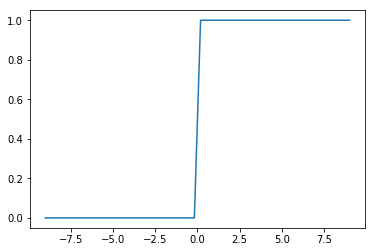

In [5]:
def relu_derivative(n):
    return 1 * (n > 0)

xx = np.linspace(start=-9, stop=+9)
yy = relu_derivative(xx)

plt.plot(xx, yy)

In [6]:
%time tmp = [sigmoid(i) for i in range(1000000)]
%time tmp = [sigmoid_derivative(i) for i in range(1000000)]

CPU times: user 1.47 s, sys: 16.4 ms, total: 1.49 s
Wall time: 1.49 s
CPU times: user 3.34 s, sys: 25.7 ms, total: 3.37 s
Wall time: 3.38 s


In [7]:
%time tmp = [relu(i) for i in range(1000000)]
%time tmp = [relu_derivative(i) for i in range(1000000)]

CPU times: user 168 ms, sys: 14.6 ms, total: 183 ms
Wall time: 182 ms
CPU times: user 162 ms, sys: 7.57 ms, total: 169 ms
Wall time: 170 ms


## Load Dataset

In [8]:
from sklearn.datasets import load_digits

mnist = load_digits()

In [9]:
X = mnist["data"]

print(X.shape)
X

(1797, 64)


array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [10]:
y = mnist["target"]

print(y.shape)
y

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

## Preprocessing

In [11]:
from keras.utils import to_categorical

y_hot = to_categorical(y)

print(y_hot.shape)
y_hot

Using TensorFlow backend.


(1797, 10)


array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]], dtype=float32)

## Train

In [12]:
import time

def train(X, y, y_hot, num_epoch, learning_rate, activation, activation_derivative):
    num_input = X.shape[1]
    num_output = y_hot.shape[1]

    w1 = np.random.uniform(low=-np.sqrt(6 / (num_input + 100)), high=np.sqrt(6 / (num_input + 100)), size=(num_input, 100))
    w2 = np.random.uniform(low=-np.sqrt(6 / (100 + 100)), high=np.sqrt(6 / (100 + 100)), size=(100, 100))
    w3 = np.random.uniform(low=-np.sqrt(6 / (100 + num_output)), high=np.sqrt(6 / (100 + 10)), size=(100, num_output))

    history = []

    start = time.time()

    for epoch in range(num_epoch):
        z1 = X.dot(w1)
        a1 = activation(z1)
        z2 = a1.dot(w2)
        a2 = activation(z2)
        z3 = a2.dot(w3)
        a3 = sigmoid(z3)

        y_predict = np.argmax(a3, axis=1)    
        error = (y != y_predict).mean()

        if epoch % 10 == 0:
            print("{0:2} error = {1:.5f}".format(epoch, error))

        end = time.time()
        history.append({
            'time': end - start,
            'error': error
        })

        d3 = a3 - y_hot
        d2 = d3.dot(w3.T) * activation_derivative(a2)
        d1 = d2.dot(w2.T) * activation_derivative(a1)

        w3 = w3 - learning_rate * a2.T.dot(d3)
        w2 = w2 - learning_rate * a1.T.dot(d2)
        w1 = w1 - learning_rate * X.T.dot(d1)

    end = time.time()
    elapsed = end - start

    return history, error, elapsed

### Sigmoid

In [13]:
num_epoch = 100
learning_rate = 0.0003

sigmoid_history, error, elapsed = train(X, y, y_hot, num_epoch, learning_rate,
                                        activation=sigmoid,
                                        activation_derivative=sigmoid_derivative)

print("----" * 10)
print("[sigmoid] Elapsed {0:.2f} seconds, error = {1:.5f}".format(elapsed, error))

 0 error = 0.90317
10 error = 0.35114
20 error = 0.38119
30 error = 0.40790
40 error = 0.38564
50 error = 0.35615
60 error = 0.35225
70 error = 0.29772
80 error = 0.26377
90 error = 0.23150
----------------------------------------
[sigmoid] Elapsed 1.55 seconds, error = 0.19533


### ReLU

In [14]:
num_epoch = 100
learning_rate = 0.00001

relu_history, error, elapsed = train(X, y, y_hot, num_epoch, learning_rate,
                                     activation=relu,
                                     activation_derivative=relu_derivative)

print("----" * 10)
print("[ReLU] Elapsed {0:.2f} seconds, error = {1:.5f}".format(elapsed, error))

 0 error = 0.91430
10 error = 0.33222
20 error = 0.13689
30 error = 0.08625
40 error = 0.06900
50 error = 0.05565
60 error = 0.04619
70 error = 0.03895
80 error = 0.03506
90 error = 0.03339
----------------------------------------
[ReLU] Elapsed 0.79 seconds, error = 0.03172


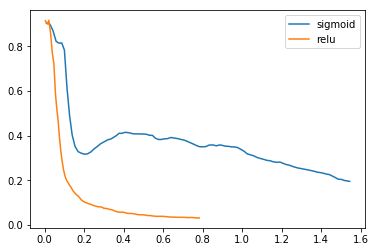

In [15]:
%matplotlib inline
import pandas as pd

sigmoid_history = pd.DataFrame(sigmoid_history)
relu_history = pd.DataFrame(relu_history)

plt.plot(sigmoid_history["time"], sigmoid_history["error"], label="sigmoid")
plt.plot(relu_history["time"], relu_history["error"], label="relu")
plt.legend()